0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survival_binary, Length: 891, dtype: int64
Overall probability of survival : 0.3838
[8.84797812e-08 1.26304874e-07 1.79348050e-07 2.53325216e-07
 3.55934508e-07 4.97480804e-07 6.91674427e-07 9.56645047e-07
 1.31621903e-06 1.80151630e-06 2.45293110e-06 3.32256894e-06
 4.47722056e-06 6.00196016e-06 8.00446130e-06 1.06201268e-05
 1.40181291e-05 1.84084530e-05 2.40500236e-05 3.12599830e-05
 4.04241589e-05 5.20087286e-05 6.65730413e-05 8.47835040e-05
 1.07428368e-04 1.35433173e-04 1.69876523e-04 2.12005751e-04
 2.63251942e-04 3.25243668e-04 3.99818665e-04 4.89032600e-04
 5.95163983e-04 7.20714184e-04 8.68401517e-04 1.04114831e-03
 1.24205992e-03 1.47439483e-03 1.74152492e-03 2.04688541e-03
 2.39391421e-03 2.78598059e-03 3.22630371e-03 3.71786174e-03
 4.26329306e-03 4.86479124e-03 5.52399620e-03 6.24188431e-03
 7.01866072e-03 7.85365736e-03 8.74524059e-03 9.69073236e-03
 1.06863488e-02 1.

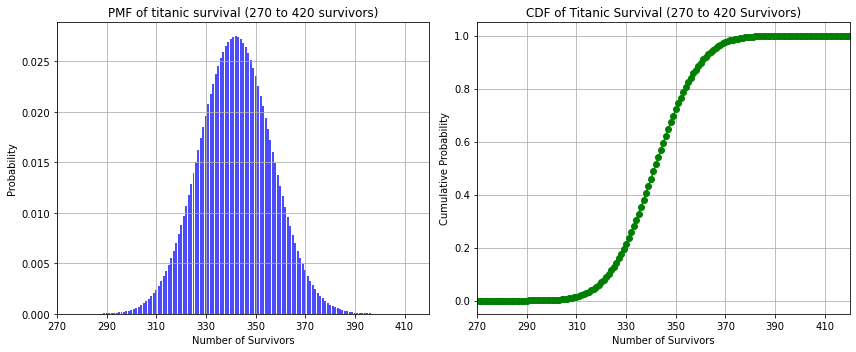

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

titanic_df = pd.read_csv(r'titanic.csv')

# Define success : 1 if survived , otherwise 0
def classify_survival(row):
    if row['survived'] == 1:
        return 1 # Success
    else:
        return 0 #failure

# apply the function to create binary column
titanic_df['survival_binary'] = titanic_df.apply(classify_survival, axis=1)
print(titanic_df['survival_binary'])

# total number of trials (total observations)
n = len(titanic_df)

# number of successes (survivors)
k = titanic_df['survival_binary'].sum()

# probability of success (p)
p = k / n
print(f"Overall probability of survival : {p:.4f}")

# define number of trials for the binomial distribution
trials = n

# generate x values (number of successes from 270 to 420)
x = np.arange(270, 420+1)

#calculate the PMF for each number of successes
pmf_values = binom.pmf(x, trials, p)
print(pmf_values)

# calculate the CDF for each number of successes
cdf_values = binom.cdf(x, trials, p)

# create a figure and subplots
fig, (ax1,ax2) = plt.subplots(1, 2 , figsize = (12,5))

# Plotting the PMF in the 1st subplot
ax1.bar(x , pmf_values, color = 'blue', alpha = 0.7)
ax1.set_title('PMF of titanic survival (270 to 420 survivors)')
ax1.set_xlabel('Number of Survivors')
ax1.set_ylabel('Probability')
ax1.set_xlim(270, 420)      #set x-axis limits between 270 and 420
ax1.set_xticks(np.arange(270, 421, step = 20))      # set ticks every 20 units 
ax1.grid()

# Plotting the CDF in the second subplot
ax2.plot(x, cdf_values, color='green', marker ='o', linestyle = '-', label= 'CDF')
ax2.set_title('CDF of Titanic Survival (270 to 420 Survivors)')
ax2.set_xlabel('Number of Survivors')
ax2.set_ylabel('Cumulative Probability')
ax2.set_xlim(270,420)   # set x-axis limits between 270 and 420
ax2.set_xticks(np.arange(270, 420, step=20))        # Set ticks every 20 units 
ax2.grid()

plt.tight_layout()
plt.show()
